\begin{center}
\begin{huge}
MCIS6273 Data Mining (Prof. Maull) / Fall 2023 / HW2
\end{huge}
\end{center}

| Points <br/>Possible | Due Date | Time Commitment <br/>(estimated) |
|:---------------:|:--------:|:---------------:|
| 40 | Sunday, December 10 @ Midnight | _up to_ 24 hours |


* **GRADING:** Grading will be aligned with the completeness of the objectives.

* **INDEPENDENT WORK:** Copying, cheating, plagiarism  and academic dishonesty _are not tolerated_ by University or course policy.  Please see the syllabus for the full departmental and University statement on the academic code of honor.

## OBJECTIVES
* Perform data engineering on assignment dataset.

* [supervised learning] Perform K-means analysis on real-world data.

* [supervised learning/advances] Listen to this podcast about the future of search and advances in supervised learning.

## WHAT TO TURN IN
You are being encouraged to turn the assignment in using the provided
Jupyter Notebook.  To do so, make a directory in your Lab environment called
`homework/hw2`.   Put all of your files in that directory.  Then zip that directory,
rename it with your name as the first part of the filename (e.g. `maull_hw2_files.zip`), then
download it to your local machine, then upload the `.zip` to Blackboard.

If you do not know how to do this, please ask, or visit one of the many tutorials out there
on the basics of using zip in Linux.

If you choose not to use the provided notebook, you will still need to turn in a
`.ipynb` Jupyter Notebook and corresponding files according to the instructions in
this homework.


## ASSIGNMENT TASKS
### (30%) Perform data engineering on assignment dataset. 

In this part of the assignment we will be introduced
to a specific dataset that will be very interesting
and unique.

In the US (and most other counties), regulatory agencies
control and inspect food and other products that come
into the country and or otherwise imported for sale
by wholesalers and retailers.

One such area that we are going to explore is in what
is called "import refusal".  Import refusal refers to
the regulary mechanism which rejects products from
importation into the coutry by way of the US FDA 
(Food and Drug Administration) --
specificially if an inspected regulated product
is not in compliance with FDA standards, the 
owner/cosignee is allowed to respond to the refusal
and either show evidence that the product is 
in compliance (i.e. the FDA made a mistake) or
produce a plan to bring the product into 
compliance -- otherwise the product is exported
back to the owner/cosignee or destroyed.

The mechanism used to track these refusals is
called the IRR or "Import Refusal Report".

You can (and might want to) read more about this IRR here:

* [https://www.fda.gov/industry/fda-import-process/import-refusals](https://www.fda.gov/industry/fda-import-process/import-refusals)

We will explore the data in this report with
some unsupervised learning mechanisms, but
before we do, will do perform some standard
data engineering to bring the report into alignment
with the tools required to do what we'd like later.

**&#167; Task:**  Load and unzip the compressed ZIP import refusal report for 2014-present.  You can use
Jupyter "magics" (the easiest way), or you can write Python code to load
the ZIP file, and unzip it.  If you choose that method, you may like 
to make use of:

* [Python Requests library](https://docs.python-requests.org/en/master/index.html)
* [Python zip/unzip `zipfile` library](https://docs.python.org/3/library/zipfile.html)

You will find the file on this page: 

* [https://www.accessdata.fda.gov/scripts/ImportRefusals/index.cfm](https://www.accessdata.fda.gov/scripts/ImportRefusals/index.cfm)

And to get the URL of the ZIP file, select the 2014-present file and open your browser developer 
tools, click Download and see the actual URL (watch network traffic tab), or (less fun), use this URL:

* [2014-present.zip](https://www.accessdata.fda.gov/scripts/ImportRefusals/downloads/Import_Refusal_2014-present.zip) 

In [19]:
# Get the file
!wget -nc https://www.accessdata.fda.gov/scripts/ImportRefusals/downloads/Import_Refusal_2014-present.zip

File ‘Import_Refusal_2014-present.zip’ already there; not retrieving.



In [20]:
# Unzip the file
!unzip -o Import_Refusal_2014-present.zip

Archive:  Import_Refusal_2014-present.zip
  inflating: ACT_SECTION_CHARGES.csv  
  inflating: REFUSAL_ENTRY_2014-October2023.csv  


**&#167; Task:**  Now that you have the data, you will read the CSV file.  Produced a 
file called `"country_violations_2014-2023.csv"` which contains just the
counts of the violations **grouped by** `['ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME']`.

* you will need to use `groupby().count()` and restrict the columns to a single 
  column (`ENTRY_NUM` will do) using `.loc()`
  
**Response:** See code below.

In [21]:
import pandas as pd

# Read in the file
t1 = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-3')

# Group and count the violations
t1 = t1.groupby(['ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME']).count()['ENTRY_NUM'].reset_index(name="VIOLATIONS_COUNT")

# Save the file
t1.to_csv('country_violations_2014-2023.csv', index=False)

**&#167; Task:**  Produce a CSV file which includes the same data as `"country_violations_2014-2023.csv"`
except it groups by `'YEAR'`, `'MONTH'`, `'ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME'`.  You will
might like to take the column `REFUSAL_DATE` and break it into a `YEAR` and `MONTH`
column of its own, then do the grouping.  You new file should be called 
`"country_violations_year_month_2014-2023.csv"`.

**Response:** See code below.

In [22]:
import pandas as pd

# Read in the original file
t2 = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-3')

# Clean up the date data to enable grouping
t2['REFUSAL_DATE'] = pd.to_datetime(t2['REFUSAL_DATE'], format='mixed')

# Create YEAR from REFUSAL_DATE
t2['YEAR'] = t2['REFUSAL_DATE'].dt.strftime('%Y')

# Create MONTH from REFUSAL_DATE
t2['MONTH'] = t2['REFUSAL_DATE'].dt.strftime('%m')

# Group and count the violations
t2 = t2.groupby(['YEAR', 'MONTH', 'ISO_CNTRY_CODE', 'PROVINCE_STATE', 'CITY_NAME']).count()['ENTRY_NUM'].reset_index(name="VIOLATIONS_COUNT")

# Save the file
t2.to_csv('country_violations_year_month_2014-2023.csv', index=False)

**&#167; Task:**  Which city, country, province had the most violations in a single month?  How many?  Which month and year?

**Response:** See code below. The city, province, and country with the most violations in a single month was Ciudad De Mexico, Ciudad de Mexico, MX (Mexico) with 613 violations in 2022/04.

In [23]:
import pandas as pd

# Read in the original file
t3 = pd.read_csv('country_violations_year_month_2014-2023.csv')

# Sort by Violations_Count in descending order and return the top row
t3.sort_values('VIOLATIONS_COUNT', ascending=False).head(1)

,YEAR,MONTH,ISO_CNTRY_CODE,PROVINCE_STATE,CITY_NAME,VIOLATIONS_COUNT
36544,2022,4,MX,Ciudad de Mexico,Ciudad De Mexico,613


**&#167; Task:**  What are the 10 most frequent products in the IRR for 2018 (using `'PRDCT_CODE_DESC_TEXT'`)?

**Response:** See code below. The 10 most frequent products in the IRR for 2018 are:
1. SUNGLASSES (NON-PRESCRIPTION INCLUDING PHOTOSENSITIVE)
2. MISCELLANEOUS PATENT MEDICINES, ETC.
3. VITAMIN, MINERAL, PROTEINS AND UNCONVENTIONAL DIETARY SPECIALITIES FOR HUMANS AND ANIMALS, N.E.C.
4. TUNA (ALBACORE, YELLOWFIN, BLUEFIN, SKIPJACK, ETC.)
5. HERBALS & BOTANICALS (NOT TEAS), N.E.C.
6. MAHI MAHI
7. ULTRAVIOLET SCREEN/SUNSCREEN N.E.C.
8. GLOVE, PATIENT EXAMINATION, POLY
9. BATH SOAPS AND DETERGENTS (NOT ANTIPERSPIRANT) (PERSONAL CLEANLINESS)
10. LENSES, SOFT CONTACT, DAILY WEAR

In [24]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Read in the file
t4 = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-3')

# Clean up the date data to enable grouping
t4['REFUSAL_DATE'] = pd.to_datetime(t4['REFUSAL_DATE'], format='mixed')

# Create YEAR from REFUSAL_DATE
t4['YEAR'] = t4['REFUSAL_DATE'].dt.strftime('%Y')

# Filter YEAR to 2018
t4 = t4[t4['YEAR'] == '2018']

# Group and count the violations
t4 = t4.groupby(['PRDCT_CODE_DESC_TEXT']).count()['ENTRY_NUM'].reset_index(name="VIOLATIONS_COUNT")

# Sort by Violations_Count in descending order and return the top 10 rows.
t4.sort_values('VIOLATIONS_COUNT', ascending=False).head(10)

,PRDCT_CODE_DESC_TEXT,VIOLATIONS_COUNT
2168,SUNGLASSES (NON-PRESCRIPTION INCLUDING PHOTOSENSITIVE),575
1411,"MISCELLANEOUS PATENT MEDICINES, ETC.",433
2405,"VITAMIN, MINERAL, PROTEINS AND UNCONVENTIONAL DIETARY SPECIALITIES FOR HUMANS AND ANIMALS, N.E.C.",298
2340,"TUNA (ALBACORE, YELLOWFIN, BLUEFIN, SKIPJACK, ETC.)",244
1079,"HERBALS & BOTANICALS (NOT TEAS), N.E.C.",237
1311,MAHI MAHI,190
2350,ULTRAVIOLET SCREEN/SUNSCREEN N.E.C.,183
994,"GLOVE, PATIENT EXAMINATION, POLY",173
196,BATH SOAPS AND DETERGENTS (NOT ANTIPERSPIRANT) (PERSONAL CLEANLINESS),172
1252,"LENSES, SOFT CONTACT, DAILY WEAR",154


**&#167; Task:**  **BONUS (+1 point)** What was the company associated with the largest violation in a single month?

**Response:** See code below. The company with the largest number of violations in a single month is COMERCIALIZADORA PEPSICO.

In [25]:
import pandas as pd

# Read in the original file
t5 = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-3')

# Clean up the date data to enable grouping
t5['REFUSAL_DATE'] = pd.to_datetime(t5['REFUSAL_DATE'], format='mixed')

# Create YEAR from REFUSAL_DATE
t5['YEAR'] = t5['REFUSAL_DATE'].dt.strftime('%Y')

# Create MONTH from REFUSAL_DATE
t5['MONTH'] = t5['REFUSAL_DATE'].dt.strftime('%m')

# Group and count the violations
t5 = t5.groupby(['YEAR', 'MONTH', 'LGL_NAME']).count()['ENTRY_NUM'].reset_index(name="VIOLATIONS_COUNT")

# Sort and get company with the most violations
t5.sort_values('VIOLATIONS_COUNT', ascending=False).head(1)

,YEAR,MONTH,LGL_NAME,VIOLATIONS_COUNT
67380,2022,04,COMERCIALIZADORA PEPSICO,610


### (50%) [supervised learning] Perform K-means analysis on real-world data. 

The goal of cluster analysis is to extract data patterns 
from data that does not contain  (or is not used for) training
instances.  We call this _unsupervised learning_, since there
is no training data to build models from.

Instead, we use some of the commonly studied _distance metrics_
to develop a notion of similarity.  Indeed, we are trying to
optimize for instances of a cluster to maximize _intra_-cluster 
(within-cluster) similarity, while _inter_-cluster similarity is
minimized -- put another way, instances that belong to a cluster
should look close to one another.

There are many clustering algorithms, but one of the most robust and
useful is the $K$-means algorithm.  

**&#167; Task:**  Prepare the data such that you have three datasets where the `REFUSAL_CHARGES`,
`ISO_CNTRY_CODE` and `CITY_NAME` are the columns (features).

You will need to use the `LabelBinarizer()` (for countries and cities) and `MultiLabelBinarizer()` (for the charges)
of the sklearn libraries.

See:

* [`sklearn.preprocessing.LabelBinarizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) 
* [`sklearn.preprocessing.MultiLabelBinarizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html)

**Response:** See code below.

In [2]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# Read in the original file
t6_0 = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-3')

# Get a 30% sample of the original file to reduce memory usage
t6_sample = t6_0.sample(frac=0.3)

# Get only the columns we will be using
t6_1 = t6_sample[['ISO_CNTRY_CODE', 'PROVINCE_STATE', 'REFUSAL_CHARGES']]

# Get only countries that have more than 10 occurances
ISO_List = t6_1.ISO_CNTRY_CODE.value_counts().where(lambda d: d>10).dropna().index.tolist()

# Get only the provinces/states with more then 25 occurances
Prov_List = t6_1.PROVINCE_STATE.value_counts().where(lambda d: d>25).dropna().index.tolist()

# Filter the DataFrame on the list of countries
t6_1_filtered = t6_1[t6_1['ISO_CNTRY_CODE'].isin(ISO_List)]

# Filter the DataFrame on the list of provinces/states
t6_1_filtered = t6_1_filtered[t6_1_filtered['PROVINCE_STATE'].isin(Prov_List)]

# Split the refusal charges so each one is its own value
RC = t6_1_filtered['REFUSAL_CHARGES'].str.split(',')

# Use get_dummies to binarize the country and provinces/states adding prefixes so we
# can differentiate them
Bin_I = pd.get_dummies(t6_1_filtered.ISO_CNTRY_CODE, dtype=int, prefix='I_')
Bin_P = pd.get_dummies(t6_1_filtered.PROVINCE_STATE, dtype=int, prefix='P_')

# Use multilabel binarizer on the refusal codes
Bin_R = pd.DataFrame(mlb.fit_transform(RC),
                     columns = mlb.classes_,
                     index = t6_1_filtered.index)

**&#167; Task:**  Merge the three Dataframes above into one -- the final Dataframe should have 435 columns.  These
represent the features that will allow clustering to occur.  This will allow us to see
the clusters that emerge along those categories of features in the data.  With a bit 
more information, we might come to the conclusion that some of these features should
be removed.

**Response:** See code below.

In [3]:
# Concat the three dataframes and display it
t7 = pd.concat([Bin_I, Bin_P, Bin_R], axis=1)
t7

,I__AE,I__AT,I__AU,I__BD,I__BE,I__BR,I__CA,I__CH,I__CL,I__CN,...,64,71,72,73,75,78,82,83,84,9
90673,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
146529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61906,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**&#167; Task:**  You will now take the dataset from the first part and begin the process of 
clustering.

To be successful, please study the following:

* [K-Means in scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [K-Means example notebook](https://nbviewer.jupyter.org/github/tmbdev/teaching-mmir/blob/master/30-kmeans.ipynb)

You will set three $K$ to 5, 10 and 12.  You will need to report the centroids
for each cluster and in words how you would describe that cluster.  I will give more guidance 
on this.

**Response:** See following cells for code and descriptions.

In [4]:
import pandas as pd
from sklearn.cluster import KMeans

# Code to discover which cluster is the largest
pd.DataFrame(KMeans(n_clusters=5, max_iter=200, n_init=10, random_state=0).fit_predict(t7)).value_counts()

2    10586
4     3875
0     3608
1     3522
3     3047
Name: count, dtype: int64

In [5]:
import pandas as pd
from sklearn.cluster import KMeans

# Run KMeans
km5 = KMeans(n_clusters=5, max_iter=200, n_init=10, random_state=0).fit(t7)

# Convert centroids for each cluster to a DataFrame and display it
km5 = pd.DataFrame(km5.cluster_centers_, columns = km5.feature_names_in_)
km5

,I__AE,I__AT,I__AU,I__BD,I__BE,I__BR,I__CA,I__CH,I__CL,I__CN,...,64,71,72,73,75,78,82,83,84,9
0,6.097561e-03,1.829268e-02,1.080931e-02,-1.734723e-18,2.771619e-03,1.552106e-02,6.125277e-02,1.662971e-03,-9.540979e-18,1.685144e-01,...,-1.734723e-17,4.033232e-17,-1.144917e-16,4.472334e-18,0.000277,2.771619e-04,-8.673617e-19,-3.851086e-16,1.662971e-03,-5.967449e-16
1,4.900594e-17,9.454243e-17,4.336809e-16,-2.195509e-18,2.515349e-17,-2.983724e-16,-2.352285e-15,-1.045171e-16,-9.540979e-18,-2.775558e-16,...,2.839296e-04,5.678592e-04,2.839296e-03,4.282599e-18,0.142249,5.678592e-04,-1.097755e-18,4.258944e-03,-4.336809e-17,3.776263e-02
2,2.267145e-03,6.801436e-03,4.156433e-02,3.778575e-04,4.817684e-03,4.846023e-02,1.244096e-01,4.723219e-03,4.912148e-03,-1.720846e-15,...,1.511430e-03,2.361610e-03,1.152466e-02,-2.859583e-18,0.221330,3.684111e-03,9.446439e-05,1.199698e-02,6.518043e-03,4.638201e-02
3,4.488597e-17,7.372575e-17,5.447032e-16,-4.418124e-18,5.854692e-17,1.179612e-16,-2.185752e-15,-8.760354e-17,-9.107298e-18,1.000000e+00,...,9.845750e-04,3.794708e-17,1.148671e-02,3.049319e-18,0.068592,8.861175e-03,3.281917e-04,7.548408e-03,1.969150e-03,7.548408e-03
4,5.139118e-17,1.066855e-16,2.012279e-16,-5.149960e-19,-9.974660e-18,-5.412337e-16,-2.449430e-15,-1.149254e-16,3.035766e-18,2.026157e-15,...,5.161290e-04,2.883978e-17,5.161290e-04,7.741935e-04,0.220645,5.334275e-17,-2.574980e-19,1.341935e-02,-4.510281e-17,1.667097e-01


**Response for $K$ 5:** The largest cluster is index 2. This clusters largest factor is refusal code 75. Geographically, it is focused around Canada, with a lesser focus on Canada's Ontario Province. See code below.

In [6]:
import pandas as pd
from sklearn.cluster import KMeans

# Transpose the centroids
km5 = km5.T

# Select the largest centroid
km5_c = km5[[2]]

# Filter the values to minimize noise and display
km5_c = km5_c[km5_c[2] > 0.05]
km5_c

,2
I__CA,0.124410
I__DE,0.062441
I__ID,0.063575
I__KR,0.052333
I__US,0.096637
P__Ontario,0.060457
118,0.050444
482,0.070754
249,0.091725
75,0.221330


In [7]:
import pandas as pd
from sklearn.cluster import KMeans

# Code to discover which cluster is the largest
pd.DataFrame(KMeans(n_clusters=10, max_iter=200, n_init=10, random_state=0).fit_predict(t7)).value_counts()

6    6785
3    3556
2    3198
1    2800
0    2606
9    2441
8    1115
4    1067
7     706
5     364
Name: count, dtype: int64

In [11]:
import pandas as pd
from sklearn.cluster import KMeans

# Run KMeans
km10 = KMeans(n_clusters=10, max_iter=200, n_init=10, random_state=0).fit(t7)

# Convert centroids for each cluster to a DataFrame and display it
km10 = pd.DataFrame(km10.cluster_centers_, columns = km10.feature_names_in_)
km10

,I__AE,I__AT,I__AU,I__BD,I__BE,I__BR,I__CA,I__CH,I__CL,I__CN,...,64,71,72,73,75,78,82,83,84,9
0,3.946496e-17,4.683753e-17,3.920475e-16,-3.659182e-18,5.464379e-17,4.093947e-16,-1.991463e-15,-6.591949e-17,-9.107298e-18,1.000000e+00,...,-1.572093e-17,3.512815e-17,1.266309e-02,1.477225e-18,6.868764e-02,1.036071e-02,3.837299e-04,8.442057e-03,1.918649e-03,7.674597e-03
1,4.206704e-17,5.984796e-17,4.649059e-16,-4.201283e-18,5.637851e-17,3.400058e-16,-2.088607e-15,-7.632783e-17,-9.540979e-18,-1.026956e-15,...,7.142857e-04,3.664603e-17,7.142857e-04,1.071429e-03,-3.025358e-15,2.992398e-17,-2.100642e-18,1.750000e-02,-3.989864e-17,2.303571e-01
2,6.253909e-04,1.188243e-02,6.253909e-03,-4.065758e-18,7.817386e-03,1.125704e-02,1.516573e-01,2.188868e-03,-9.540979e-18,5.628518e-03,...,-1.680513e-17,3.881444e-17,-1.110223e-16,3.469447e-18,1.000000e+00,4.033232e-17,-2.032879e-18,-3.348016e-16,-4.206704e-17,-5.828671e-16
3,6.186727e-03,1.856018e-02,1.096738e-02,-2.032879e-18,2.812148e-03,1.490439e-02,6.214848e-02,1.687289e-03,-9.540979e-18,1.687289e-01,...,-1.734723e-17,4.033232e-17,-1.144917e-16,4.336809e-18,-7.494005e-16,2.812148e-04,-1.016440e-18,-3.851086e-16,1.687289e-03,-5.967449e-16
4,-1.344411e-17,-6.678685e-17,-1.804112e-16,1.436568e-18,1.387779e-17,1.353084e-16,6.560450e-03,5.637851e-18,-8.673617e-18,-8.604228e-16,...,9.372071e-04,7.155734e-18,-4.683753e-17,-1.233280e-18,-3.885781e-16,-3.339343e-17,7.182839e-19,4.510281e-17,-1.084202e-17,-4.302114e-16
5,1.734723e-18,5.204170e-18,2.428613e-17,-3.252607e-19,1.127570e-17,4.857226e-17,1.249001e-16,5.204170e-18,-6.505213e-18,1.000000e+00,...,3.686287e-18,-8.673617e-19,5.494505e-03,-4.336809e-19,3.296703e-02,2.602085e-18,-1.626303e-19,3.469447e-17,2.747253e-03,8.241758e-03
6,2.652911e-03,5.011054e-03,5.998526e-02,5.895357e-04,3.095063e-03,6.013265e-02,1.071481e-01,3.389831e-03,7.663965e-03,1.287859e-14,...,1.915991e-03,3.684598e-03,1.798084e-02,8.104411e-18,8.160139e-15,5.747973e-03,1.473839e-04,1.650700e-02,1.016949e-02,5.851142e-02
7,-2.385245e-18,6.071532e-18,-1.144917e-16,8.944668e-19,-4.770490e-18,-1.006140e-16,1.457168e-16,5.637851e-18,-8.239937e-18,-6.938894e-16,...,-7.589415e-19,-8.673617e-19,2.602085e-18,-1.016440e-18,1.558074e-02,3.035766e-18,4.472334e-19,2.832861e-03,1.344411e-17,1.203966e-01
8,3.587444e-03,-7.285839e-17,1.165919e-02,1.490778e-18,4.484305e-03,6.457399e-02,8.789238e-02,1.793722e-02,-8.673617e-18,6.008969e-02,...,5.381166e-03,9.324139e-18,-5.117434e-17,-1.260385e-18,8.071749e-03,-3.642919e-17,7.453890e-19,1.614350e-02,-1.257675e-17,8.968610e-03
9,3.686287e-17,3.469447e-17,3.191891e-16,-3.144186e-18,5.290907e-17,3.955170e-16,-1.894318e-15,-5.594483e-17,-9.540979e-18,-9.992007e-16,...,-1.539567e-17,8.193363e-04,4.096682e-03,7.453890e-19,2.048341e-01,8.193363e-04,-1.572093e-18,5.735354e-03,-3.686287e-17,5.448587e-02


**Response for $K$ 10:** The largest cluster is index 6. Again, geographically, this cluster is focused around Canada, with a lesser focus on Canada's Ontario Province. However, the refusal codes are less influencial, with 249 being the most common one. See code below.

In [10]:
import pandas as pd
from sklearn.cluster import KMeans

# Transpose the centroids
km10 = km10.T

# Select the largest centroid
km10_c = km10[[6]]

# Filter the values to minimize noise and display
km10_c = km10_c[km10_c[6] > 0.05]
km10_c

,6
I__AU,0.059985
I__BR,0.060133
I__CA,0.107148
I__DE,0.065586
I__KR,0.060280
I__US,0.090789
P__Ontario,0.053500
11,0.054974
241,0.064702
249,0.107885


In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# Code to discover which cluster is the largest
pd.DataFrame(KMeans(n_clusters=12, max_iter=200, n_init=10, random_state=0).fit_predict(t7)).value_counts()

8     6476
0     3225
1     2889
9     2529
3     2143
6     1626
4     1368
5     1061
2     1016
7      888
11     743
10     674
Name: count, dtype: int64

In [13]:
import pandas as pd
from sklearn.cluster import KMeans

# Run KMeans
km12 = KMeans(n_clusters=12, max_iter=200, n_init=10, random_state=0).fit(t7)

# Convert centroids for each cluster to a DataFrame and return it
km12 = pd.DataFrame(km12.cluster_centers_, columns = km12.feature_names_in_)
km12

,I__AE,I__AT,I__AU,I__BD,I__BE,I__BR,I__CA,I__CH,I__CL,I__CN,...,64,71,72,73,75,78,82,83,84,9
0,4.640385e-17,8.239937e-17,5.759282e-16,-3.903128e-18,5.334275e-17,-5.551115e-17,-2.262079e-15,-9.497611e-17,-9.540979e-18,-1.054712e-15,...,6.201550e-04,3.903128e-17,6.201550e-04,9.302326e-04,2.651163e-01,4.119968e-17,-1.951564e-18,1.612403e-02,-4.250073e-17,-5.898060e-16
1,4.293441e-17,6.505213e-17,4.926615e-16,-4.445229e-18,5.724587e-17,2.775558e-16,-2.130240e-15,-8.066464e-17,-9.540979e-18,1.000000e+00,...,1.038422e-03,3.707971e-17,1.211492e-02,2.520770e-18,7.234337e-02,9.345794e-03,3.461405e-04,7.961232e-03,2.076843e-03,7.961232e-03
2,-1.214306e-17,-5.898060e-17,5.905512e-03,1.382358e-18,1.084202e-17,1.771654e-02,9.020562e-17,6.071532e-18,-8.673617e-18,-8.326673e-16,...,-7.047314e-18,4.770490e-18,-4.163336e-17,-1.206175e-18,-1.665335e-16,-2.949030e-17,6.911789e-19,4.510281e-17,-8.239937e-18,1.000000e+00
3,9.332711e-03,6.532898e-03,9.332711e-03,-1.978669e-18,2.799813e-03,1.633224e-02,7.139524e-02,2.333178e-03,-9.107298e-18,2.636491e-01,...,-1.452831e-17,3.079134e-17,-9.540979e-17,-8.402567e-19,4.666356e-04,4.666356e-04,-9.893345e-19,-8.673617e-17,2.333178e-03,-5.481726e-16
4,6.288373e-18,-9.801188e-17,-2.116363e-16,1.653408e-18,2.949030e-17,2.393918e-16,1.000000e+00,6.505213e-18,-8.673617e-18,-8.881784e-16,...,5.847953e-03,1.778092e-17,5.043860e-02,-1.314595e-18,3.552632e-01,7.309942e-04,8.267042e-19,1.608187e-02,4.385965e-03,2.266082e-02
5,-1.301043e-17,-6.505213e-17,-1.838807e-16,1.409463e-18,1.387779e-17,1.353084e-16,2.775558e-17,6.505213e-18,-8.673617e-18,-8.326673e-16,...,9.425071e-04,6.938894e-18,-4.597017e-17,-1.206175e-18,-3.330669e-16,-3.252607e-17,7.047314e-19,4.683753e-17,-1.040834e-17,-4.232725e-16
6,1.713039e-17,-6.331741e-17,-2.220446e-16,1.029992e-18,3.773024e-17,2.949030e-16,-1.158795e-15,6.071532e-18,-9.107298e-18,-9.436896e-16,...,-1.235990e-17,2.460025e-03,4.305043e-03,-1.368805e-18,2.257073e-01,3.075031e-03,5.149960e-19,1.230012e-03,5.535055e-03,6.150062e-04
7,2.252252e-03,5.855856e-02,2.139640e-02,1.219727e-18,4.504505e-03,2.364865e-02,1.914414e-02,1.126126e-03,-8.239937e-18,2.263514e-01,...,-4.987330e-18,-6.505213e-19,-2.688821e-17,-1.138412e-18,4.996004e-16,-1.821460e-17,6.098637e-19,4.336809e-17,-8.673617e-19,-3.747003e-16
8,3.705991e-03,1.111797e-02,6.701668e-02,6.176652e-04,7.875232e-03,7.643607e-02,-2.831069e-15,7.720815e-03,8.029648e-03,1.218470e-14,...,1.235330e-03,2.007412e-03,6.794317e-03,7.887571e-18,2.018221e-01,5.095738e-03,1.544163e-04,1.513280e-02,8.184064e-03,-6.245005e-16
9,3.816392e-17,4.163336e-17,3.573530e-16,-3.442342e-18,5.377643e-17,4.024558e-16,-1.949829e-15,-6.158268e-17,-9.540979e-18,-1.026956e-15,...,-1.561251e-17,7.908264e-04,3.954132e-03,1.151965e-18,1.981020e-01,7.908264e-04,-1.721171e-18,5.931198e-03,-3.773024e-17,5.258996e-02


**Response for $K$ 12:** The largest cluster is index 8. This cluster is fully related to India, with the province of Maharashtra being the largest influence. Refusal code 9 is now the most relevant, with 249 still playing a role. See code below.

In [28]:
import pandas as pd
from sklearn.cluster import KMeans

# Transpose the centroids
km12 = km12.T

# Select the largest centroid
km12_c = km12[[8]]

# Filter the values to minimize noise and display
km12_c = km12_c[km12_c[8] > 0.05]
km12_c

,1
I__IN,1.000000
P__Andhra Pradesh,0.058058
P__Delhi,0.061061
P__Gujarat,0.181849
P__Haryana,0.085752
P__Kerala,0.051051
P__Maharashtra,0.230898
P__Tamil Nadu,0.070070
P__Uttar Pradesh,0.056056
482,0.077411


**&#167; Task:**  _(Perform elbow analysis to find optimal cluster size)_

In the previous part, we chose the cluster size $K$.  Another way to do this 
is to analyze the change in within cluster sum of squares and 
determine when such value fails to change significantly.  In other words,
when the addition of another cluster fails to significantly change
the within cluster sum of squares, then you can be confident 
more clusters won't make a difference (increasing $K$ will no longer be 
relevant).

This is often referred to as "Elbow Analysis" or the "Elbow Method" because 
you will visually find the elbow in a plot of the sum of squares 
and choose $K$ based on that. 

Study the following code, implement it, and find the optimal $K$ based on it.

Your answer must include:

* the elbow graph
* the optimal $K$
* the reanalysis of the previous answer based on the optimal $K$ (re-run your clusters and report their centroid characteristics)

Here is the code to help you:

```python
max_clusters = 15
css = [] # within cluster sum of squares

for k in range(1,max_clusters):
  kmeans = KMeans(n_clusters=k, 'k-means++', max_iter=200, n_init=10, random_state=0)
  kmeans.fit(d) # where d is the dataset you have standardized in the first part of this
  css.append(kmeans.inertia_)

# now make a line plot of all the values in css     
...
```

**Response:** See cells below for two ways of doing this. The KElbowVisualizer shows that $K$ 5 is optimal. It is the same as previously described.

In [19]:
%pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 6.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


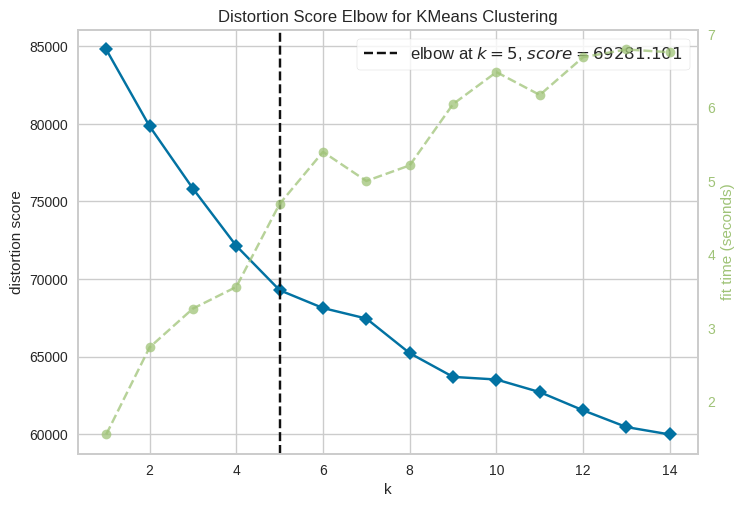

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Set the model to match code given
model = KMeans(max_iter=200,
               n_init=10,
               random_state=0)

# Create the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1,15))

# Fit and display the graph
visualizer.fit(t7)
visualizer.show() 

In [18]:
from sklearn.cluster import KMeans

max_clusters = 15
css = [] # within cluster sum of squares

for k in range(1,max_clusters):
  km = KMeans(n_clusters=k,
                  init='k-means++',
                  max_iter=200,
                  n_init=10,
                  random_state=0).fit(t7)
  css.append(km.inertia_)

css

[84796.32437697872,
 79850.02439353836,
 75830.84966230617,
 72141.33892205992,
 69281.10140712571,
 68132.1285648729,
 67454.28270921769,
 65223.03322787245,
 63694.87566697391,
 63525.58625695387,
 62713.57642498325,
 61539.22840631282,
 60459.82810234432,
 59983.43994556162]

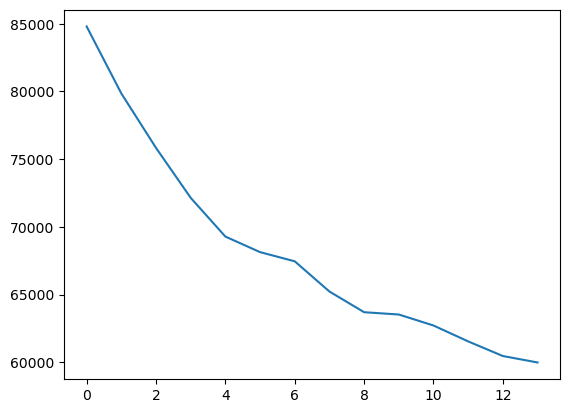

In [15]:
import matplotlib.pyplot as plt

# Plot the inertia
plt.plot(css)

However $K$ 9 seems to be of interest too. As such, I'm going to analize it below.

In [33]:
import pandas as pd
from sklearn.cluster import KMeans

# Code to discover which cluster is the largest
pd.DataFrame(KMeans(n_clusters=9, max_iter=200, n_init=10, random_state=0).fit_predict(t7)).value_counts()

3    7301
1    3587
2    2913
5    2883
8    2245
7    1696
6    1591
0    1358
4    1064
Name: count, dtype: int64

In [34]:
import pandas as pd
from sklearn.cluster import KMeans

# Run KMeans
km8 = KMeans(n_clusters=9, max_iter=200, n_init=10, random_state=0).fit(t7)

# Convert centroids for each cluster to a DataFrame and return it
km8 = pd.DataFrame(km8.cluster_centers_, columns = km8.feature_names_in_)
km8

,I__AE,I__AT,I__AU,I__BD,I__BE,I__BR,I__CA,I__CH,I__CL,I__CN,...,64,71,72,73,75,78,82,83,84,9
0,5.637851e-18,-9.801188e-17,-2.116363e-16,1.653408e-18,2.862294e-17,2.359224e-16,1.000000e+00,6.071532e-18,-9.107298e-18,-9.159340e-16,...,5.891016e-03,1.734723e-17,5.081001e-02,-1.314595e-18,3.578792e-01,7.363770e-04,8.267042e-19,1.620029e-02,4.418262e-03,2.282769e-02
1,4.965646e-17,9.627715e-17,3.885781e-16,-1.843144e-18,1.821460e-17,-3.469447e-16,-2.373102e-15,-1.066855e-16,-9.540979e-18,0.000000e+00,...,5.575690e-04,3.859760e-17,5.575690e-04,8.363535e-04,2.383607e-01,4.813858e-17,-9.215718e-19,1.449679e-02,-4.380177e-17,1.800948e-01
2,7.552352e-03,2.265705e-02,1.338826e-02,-4.499439e-18,3.432887e-03,1.922417e-02,5.423962e-02,2.059732e-03,-9.540979e-18,2.021970e-01,...,-1.637145e-17,3.729655e-17,-1.084202e-16,2.602085e-18,3.432887e-04,3.432887e-04,-2.249720e-18,-2.862294e-16,1.716444e-03,-5.828671e-16
3,2.876318e-03,9.861663e-03,5.999178e-02,5.478702e-04,6.985344e-03,3.478975e-02,-2.886580e-15,6.848377e-03,7.122312e-03,1.082467e-14,...,1.095740e-03,2.876318e-03,6.300507e-03,8.402567e-18,2.040816e-01,4.519929e-03,1.369675e-04,1.410766e-02,7.533215e-03,6.286810e-02
4,-1.301043e-17,-6.505213e-17,-1.804112e-16,1.436568e-18,1.387779e-17,1.387779e-16,2.081668e-17,6.071532e-18,-8.673617e-18,-8.326673e-16,...,9.398496e-04,7.155734e-18,-4.597017e-17,-1.219727e-18,-3.608225e-16,-3.252607e-17,7.182839e-19,4.510281e-17,-1.040834e-17,-4.232725e-16
5,4.293441e-17,6.418477e-17,4.926615e-16,-4.391019e-18,5.681219e-17,2.914335e-16,-2.123302e-15,-8.023096e-17,-9.107298e-18,1.000000e+00,...,1.040583e-03,3.707971e-17,1.214013e-02,2.520770e-18,7.249393e-02,9.365245e-03,3.468609e-04,7.977801e-03,2.081165e-03,7.977801e-03
6,1.582935e-17,-6.938894e-17,-2.289835e-16,1.301043e-18,3.642919e-17,2.879641e-16,-1.110223e-15,6.071532e-18,-9.107298e-18,-9.436896e-16,...,-1.214306e-17,2.514142e-03,4.399749e-03,-1.368805e-18,2.306725e-01,3.142678e-03,6.505213e-19,1.257071e-03,5.656820e-03,6.285355e-04
7,1.768868e-03,-5.030698e-17,1.179245e-03,5.149960e-19,3.946496e-17,1.527123e-01,1.297170e-02,6.071532e-18,-9.107298e-18,1.079009e-01,...,-1.268517e-17,2.493665e-17,-8.239937e-17,-1.368805e-18,-1.942890e-15,-2.515349e-17,2.574980e-19,4.857226e-17,-2.818926e-17,-5.134781e-16
8,3.339343e-17,1.734723e-17,2.220446e-16,-2.439455e-18,4.987330e-17,3.747003e-16,-1.769418e-15,-4.206704e-17,-9.540979e-18,-9.992007e-16,...,-1.485357e-17,8.908686e-04,4.454343e-03,-2.574980e-19,2.231626e-01,8.908686e-04,-1.219727e-18,6.681514e-03,-3.556183e-17,5.924276e-02


$K$ 9 has a primary refusal code of 75. However, geography seems to be a lesser factor. No province has a huge impact, Germany and South Korea are the primary countries. 

In [35]:
import pandas as pd
from sklearn.cluster import KMeans

# Transpose the centroids
km8 = km8.T

# Select the largest centroid
km8_c = km8[[3]]

# Filter the values to minimize noise and display
km8_c = km8_c[km8_c[3] > 0.05]
km8_c

,3
I__AU,0.059992
I__CO,0.060403
I__DE,0.090399
I__ID,0.062320
I__JP,0.052048
I__KR,0.075195
118,0.053143
482,0.076428
11,0.052459
241,0.055472


### (20%) [supervised learning/advances] Listen to this podcast about the future of search and advances in supervised learning. 

We are, as you know, entering an entirely new era of 
human-machine interaction.

LLMs, popularized by ChatGPT, Bard and others, are pushing new
paradigms of interaction with machines, fueling what many are
calling a breakthrough in Artificial Intelligence unlike
any seen in prior advances in the field (AI, has after all, 
been the intense study of computer scientists since the
1950s).

One obvious area where this is going to be immediately obvious 
is in search.  For some time, we have been using search engines
with the "poke and hope" method -- typing in some keywords
and hoping we get what we are looking for.  Have you noticed
that this method doesn't work that well?  Have you also noticed
that sometimes you spend more time trying to find the "right"
keywords instead of getting to what you want with just
the words you have to express what you reall mean?

One reason for this is that our mental models for what 
we are searching for are incomplete -- we often don't 
have enough domain knowledge to phrase the question
in a way that would yield answers even remotely
close to what we would like ...

That is all about to change.

You will listen to this 59 minute podcast interview 
with the CEO of   
Perplexity AI -- a company focused on using AI 
to improve learning.  Search might be the first test
case to demonstrate what is coming in many other areas
of the interesting use cases of AI.

Listen to this podcast:

* Machine Learning Street Talk (MLST): _Perplexity AI_: The Future of Search; May 8, 2023; Interview with Aravind Srinivas, 
  CEO and co founder of [Perplexity AI](https://www.perplexity.ai/).  You will find a variety
  of sources of the interview (pick one):

  * [Apple Podcasts](https://podcasts.apple.com/us/podcast/perplexity-ai-the-future-of-search/id1510472996?i=1000612223005)
  * [Player.fm](https://player.fm/series/machine-learning-street-talk-mlst/perplexity-ai-the-future-of-search)
  * [Spotify](https://podcasters.spotify.com/pod/show/machinelearningstreettalk/episodes/PERPLEXITY-AI%C3%A2%E2%82%AC%E2%80%9DThe-future-of-search-e23i5fq)
  * [Youtube (**no ads**, no tracking, viewed through DDG)](https://duckduckgo.com/?q=machine+learning+street+talk+perplexity&t=vivaldi&iax=videos&ia=videos&iai=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D_vMOWw3uYvk)
  * [Youtube direct (ads, account tracking, etc.)](https://www.youtube.com/watch?v=_vMOWw3uYvk)

Find out what all the hullabuloo is about.

**&#167; Task:**  Summarize the 3-5 main takeaways of the interview?  Be brief. 

**Response:**
1. The podcast largely compares our current use of search engines to how AI will impact how we interact with the web going forward.
2. Ads aren't always bad, but if they create clutter they can be a problem
3. We need to evaluate further how AI handles truth and opinions
4. AI is likely to become another tool to support us in most aspects of our lives, espically work
5. Using AI will be a new skill much like learning to use a search engine

**&#167; Task:**  Provide 3-5 sentences expressing your reactions to the interview?  Be direct, succinct and precise. 

**Response:** I am leary of this new technology. I think it has many paths to create challenges for humanity. For example, when an AI states something with authority, but is wrong, it will be hard for humans to identify that and discern what is accurate. Additionally, AI seems likely to affirm a person's specific point of view, making us more likely to only believe what they thought to be true.

**&#167; Task:**  What _one thing_ did you find most interesting or surprising in the interview? 

**Response:** The most surprising thing to me, was that Aravind Srinivas felt it was acceptable for AI to express opinions.

**&#167; Task:**  Provide _one_ criticism or concern of the work of Perplexity AI, and expand on that criticism with
a few sentences explaining why you feel your criticism/concern is warranted.

**Response:** Continuing from the previous task, my main criticism is that AI should be able to express opinions. I beleive humans already struggle to discern fact from opinion without have someone or something stating everything with athority as if it is truth. I struggle to believe they will be able to properly notate what is fact vs opinion.